In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ants
import os

In [3]:
atlas_path = "/home/student/Practicas/Practicas_SantPau/primeras_pruebas_freesurfer/data/FTD-FPD109/mri/aparc+aseg.mgz"
atlas = ants.image_read(atlas_path)
ROIS = [8,47]
PETintoT1 = ants.image_read("/home/student/Practicas/Practicas_SantPau/outs/sub-003S6257/PET-TAU/bbregister/transforms/sub-003S6257_bbregister_rr_6dof_PET-to-T1.nii")

In [4]:
def get_ROI(atlas, list_of_ROIs):
    mask = [ (x in list_of_ROIs) for x in atlas.numpy().reshape(-1)]
    mask = np.array(mask).reshape(atlas.shape)
    return mask

In [5]:
ROI_mask = get_ROI(atlas, ROIS)
df_intensities = pd.DataFrame(atlas.numpy().flatten(), columns=["tags"])
df_intensities["PET_intensities"] = PETintoT1.numpy().flatten()
df_intensities["ROIs_mask"] = ROI_mask.flatten()

In [6]:
mean_ROI_intensity = df_intensities.groupby("ROIs_mask").mean()
mean_ROI_intensity = mean_ROI_intensity.reset_index()
mean_ROI_intensity = mean_ROI_intensity["PET_intensities"][1]

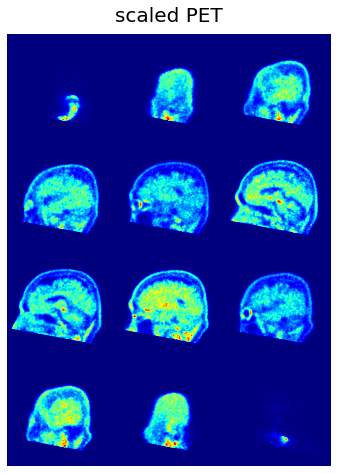

In [7]:
df_intensities["scaled_PET_intensity"] = df_intensities["PET_intensities"] / mean_ROI_intensity
scaled_PET = ants.from_numpy(df_intensities["scaled_PET_intensity"].values.reshape(atlas.shape), spacing=PETintoT1.spacing, direction=PETintoT1.direction, origin=PETintoT1.origin)
ants.plot(scaled_PET, title="scaled PET", cmap="jet")

In [8]:
df_intensities.drop('ROIs_mask', axis=1, inplace=True)
with open(os.getcwd() + "/test.csv", "w") as f:
    df_intensities.groupby("tags").mean().to_csv(f)

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [13]:
ants.plot(ants.from_numpy(int(ROI_mask)), spacing=PETintoT1.spacing, direction=PETintoT1.direction, origin=PETintoT1.origin), title="ROIs mask", cmap="jet")

SyntaxError: cannot assign to function call (<ipython-input-13-5c944fb4cdce>, line 1)